In [1]:
from scipy.io import loadmat
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

In [2]:
# From https://www.kaggle.com/datasets/sayantan99/deap-final
print(os.listdir('DEAP/'))

['s01.mat', 's02.mat', 's03.mat', 's04.mat', 's05.mat', 's06.mat', 's07.mat', 's08.mat', 's09.mat', 's10.mat', 's11.mat', 's12.mat', 's13.mat', 's14.mat', 's15.mat', 's16.mat', 's17.mat', 's18.mat', 's19.mat', 's20.mat', 's21.mat', 's22.mat', 's23.mat', 's24.mat', 's25.mat', 's26.mat', 's27.mat', 's28.mat', 's29.mat', 's30.mat', 's31.mat', 's32.mat']


In [3]:
_data = []
_labels = []

In [4]:
for l in os.listdir('DEAP/'):
    test_data = loadmat("DEAP/" + l)
    t_d = test_data['data']
    t_l = test_data['labels']
    
    _data.append(t_d)
    _labels.append(t_l)

In [5]:
data = np.array(_data)
data = data.reshape(-1, t_d.shape[1], t_d.shape[2])

In [6]:
labels = np.array(_labels)
labels = labels.reshape(-1, t_l.shape[1])

In [7]:
print(data.shape, labels.shape)

(1280, 40, 8064) (1280, 4)


# Label 기초분석

In [8]:
df_label_ratings = pd.DataFrame({'Valence' : labels[:, 0], 'Arousal' : labels[:, 1]})
print(df_label_ratings.describe())

           Valence      Arousal
count  1280.000000  1280.000000
mean      5.254313     5.156711
std       2.130816     2.020499
min       1.000000     1.000000
25%       3.867500     3.762500
50%       5.040000     5.230000
75%       7.050000     6.950000
max       9.000000     9.000000


<AxesSubplot:>

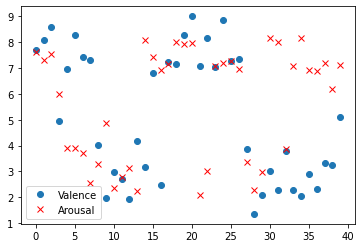

In [9]:
df_label_ratings.iloc[0:40].plot(style=['o','rx'])

In [10]:
df_hahv = df_label_ratings[(df_label_ratings['Valence'] >= np.median(labels[:,0])) 
                           & (df_label_ratings['Arousal'] >= np.median(labels[:,1]))]
df_lahv = df_label_ratings[(df_label_ratings['Valence'] >= np.median(labels[:,0])) 
                           & (df_label_ratings['Arousal'] < np.median(labels[:,1]))]


df_halv = df_label_ratings[(df_label_ratings['Valence'] < np.median(labels[:,0])) 
                           & (df_label_ratings['Arousal'] >= np.median(labels[:,1]))]
df_lalv = df_label_ratings[(df_label_ratings['Valence'] < np.median(labels[:,0])) 
                           & (df_label_ratings['Arousal'] < np.median(labels[:,1]))]

In [11]:
print("Positive Valence:", str(len(df_hahv) + len(df_lahv)))
print("Negative Valence:", str(len(df_halv) + len(df_lalv)))
print("High Arousal:", str(len(df_hahv) + len(df_halv)))
print("Low Arousal:", str(len(df_lahv) + len(df_lalv)))

Positive Valence: 680
Negative Valence: 600
High Arousal: 640
Low Arousal: 640


In [12]:
print("High Arousal Positive Valence:", str(len(df_hahv)))
print("Low Arousal Positive Valence:", str(len(df_lahv)))
print("High Arousal Negative Valence:", str(len(df_halv)))
print("Low Arousal Negative Valence:", str(len(df_lalv)))

High Arousal Positive Valence: 358
Low Arousal Positive Valence: 322
High Arousal Negative Valence: 282
Low Arousal Negative Valence: 318


In [13]:
print("HAHV")
print("Valence:", "Mean", np.round(df_hahv['Valence'].mean(),2), "STD", np.round(df_hahv['Valence'].std(),2))
print("Arousal:", "Mean", np.round(df_hahv['Arousal'].mean(),2), "STD", np.round(df_hahv['Arousal'].std(),2))
print("\nLAHV:")
print("Valence:", "Mean", np.round(df_lahv['Valence'].mean(),2), "STD", np.round(df_lahv['Valence'].std(),2))
print("Arousal:", "Mean", np.round(df_lahv['Arousal'].mean(),2), "STD", np.round(df_lahv['Arousal'].std(),2))
print("\nHALV:")
print("Valence:", "Mean", np.round(df_halv['Valence'].mean(),2), "STD", np.round(df_halv['Valence'].std(),2))
print("Arousal:", "Mean", np.round(df_halv['Arousal'].mean(),2), "STD", np.round(df_halv['Arousal'].std(),2))
print("\nLALV:")
print("Valence:", "Mean", np.round(df_lalv['Valence'].mean(),2), "STD", np.round(df_lalv['Valence'].std(),2))
print("Arousal:", "Mean", np.round(df_lalv['Arousal'].mean(),2), "STD", np.round(df_lalv['Arousal'].std(),2))

HAHV
Valence: Mean 7.23 STD 1.03
Arousal: Mean 6.87 STD 0.87

LAHV:
Valence: Mean 6.59 STD 1.1
Arousal: Mean 3.83 STD 1.17

HALV:
Valence: Mean 3.11 STD 1.25
Arousal: Mean 6.8 STD 0.97

LALV:
Valence: Mean 3.59 STD 1.19
Arousal: Mean 3.12 STD 1.32


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7fbfe1b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7fbfef2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7fbfe17c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc7fbfef9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7fbfefd60>,
 'means': []}

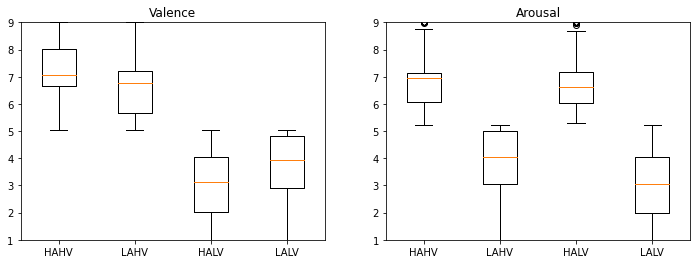

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].set_title("Valence")
axs[0].set_ylim(1, 9)
axs[0].boxplot([df_hahv['Valence'], df_lahv['Valence'], df_halv['Valence'], df_lalv['Valence']], 
               labels=['HAHV','LAHV','HALV', 'LALV'])

axs[1].set_title("Arousal")
axs[1].set_ylim(1, 9)
axs[1].boxplot([df_hahv['Arousal'], df_lahv['Arousal'], df_halv['Arousal'], df_lalv['Arousal']], 
               labels=['HAHV','LAHV','HALV', 'LALV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc7fbde73a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7fbde7ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7fbe5cfd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc7fbdf3220>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7fbdf35b0>,
 'means': []}

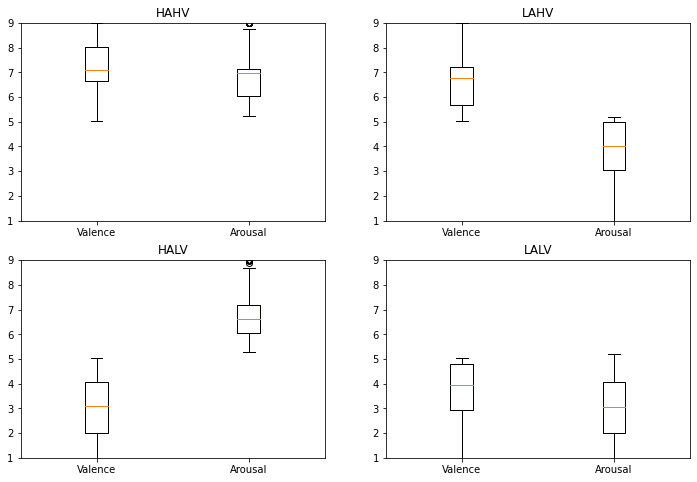

In [15]:
# Valence and Arousal ratings per group
fig, axs = plt.subplots(2, 2, figsize=(12,8))

axs[0,0].set_title("HAHV")
axs[0,0].set_ylim(1, 9)
axs[0,0].boxplot([df_hahv['Valence'], df_hahv['Arousal']], labels=['Valence','Arousal'])

axs[0,1].set_title("LAHV")
axs[0,1].set_ylim(1, 9)
axs[0,1].boxplot([df_lahv['Valence'], df_lahv['Arousal']], labels=['Valence','Arousal'])

axs[1,0].set_title("HALV")
axs[1,0].set_ylim(1, 9)
axs[1,0].boxplot([df_halv['Valence'], df_halv['Arousal']], labels=['Valence','Arousal'])

axs[1,1].set_title("LALV")
axs[1,1].set_ylim(1, 9)
axs[1,1].boxplot([df_lalv['Valence'], df_lalv['Arousal']], labels=['Valence','Arousal'])

In [16]:
def positive_valence(trial):
    return 1 if labels[trial,0] >= np.median(labels[:,0]) else 0 
def high_arousal(trial):
    return 1 if labels[trial,1] >= np.median(labels[:,1]) else 0

labels_encoded = []
for i in range (len(labels)):
    labels_encoded.append([positive_valence(i), high_arousal(i)])
    
labels_encoded = np.reshape(labels_encoded, (-1, 2))
df_labels = pd.DataFrame(data=labels_encoded, columns=["Positive Valence", "High Arousal"])

print(df_labels.describe())

       Positive Valence  High Arousal
count       1280.000000   1280.000000
mean           0.531250      0.500000
std            0.499218      0.500195
min            0.000000      0.000000
25%            0.000000      0.000000
50%            1.000000      0.500000
75%            1.000000      1.000000
max            1.000000      1.000000


In [17]:
# Dataset with only Valence column
df_valence = df_labels['Positive Valence']
# Dataset with only Arousal column
df_arousal = df_labels['High Arousal']

# 실제 데이터 확인

In [18]:
eeg_channels = np.array(["Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1", "P3", "P7", "PO3", "O1", "Oz", "Pz", "Fp2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8", "PO4", "O2"])
peripheral_channels = np.array(["hEOG", "vEOG", "zEMG", "tEMG", "GSR", "Respiration belt", "Plethysmograph", "Temperature"])

In [19]:
print(eeg_channels.shape, peripheral_channels.shape)

(32,) (8,)


In [20]:
eeg_data = []
for i in range (len(data)):
    for j in range (len(eeg_channels)):
        eeg_data.append(data[i,j])
eeg_data = np.reshape(eeg_data, (len(data), len(eeg_channels), len(data[0,0])))

print(eeg_data.shape)

(1280, 32, 8064)


In [21]:
peripheral_data = []
for i in range (len(data)):
    for j in range (32,len(data[0])):
        peripheral_data.append(data[i,j])
peripheral_data = np.reshape(peripheral_data, (len(data), len(peripheral_channels), len(data[0,0])))

print(peripheral_data.shape)

(1280, 8, 8064)


## 0번째 실험자 & 마지막 채널 데이터 확인중

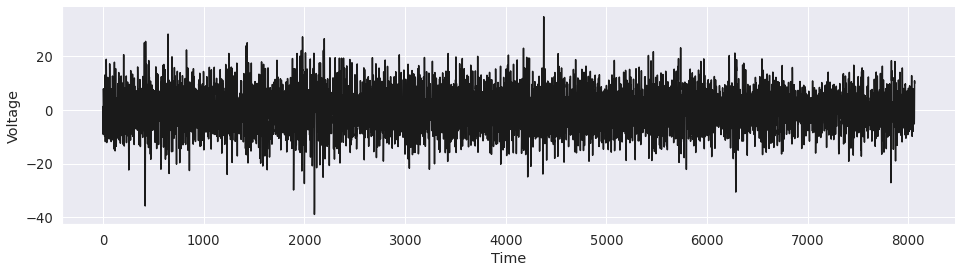

In [166]:
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 128.
time = np.arange(eeg_data.size) / sf

# Plot the signal of first trial, last channel 
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.plot(eeg_data[0,1], lw=1.5, color='k') # '02' channel?
plt.xlabel('Time')
plt.ylabel('Voltage')
sns.despine()

## signal.welch() -> 주파수, PSD 구함

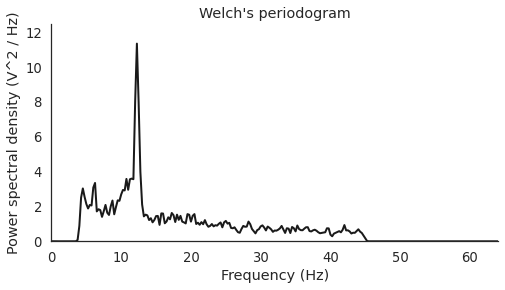

In [167]:
# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(eeg_data[0,1], sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

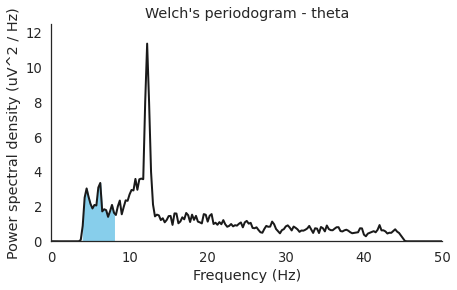

In [168]:
# Define theta lower and upper limits
low, high = 4, 8

# Find intersecting values in frequency vector
idx_theta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the theta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_theta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 50])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram - theta")
sns.despine()

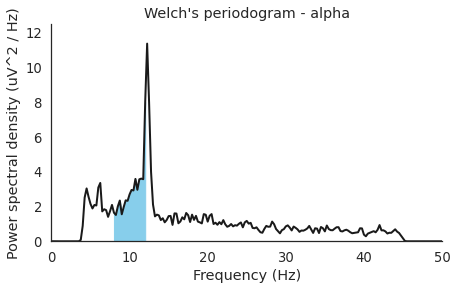

In [169]:
# Define alpha lower and upper limits
low, high = 8, 12

# Find intersecting values in frequency vector
idx_alpha = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the alpha area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_alpha, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 50])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram - alpha")
sns.despine()

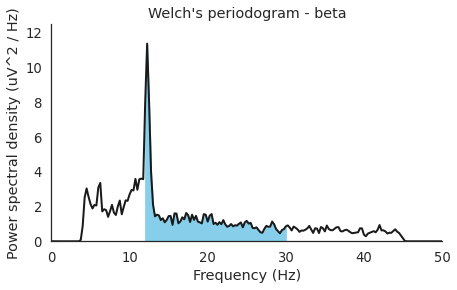

In [170]:
# Define beta lower and upper limits
low, high = 12, 30

# Find intersecting values in frequency vector
idx_beta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the beta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_beta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 50])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram - beta")
sns.despine()

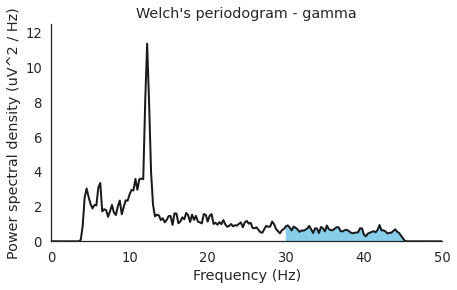

In [171]:
# Define delta lower and upper limits
low, high = 30, 64

# Find intersecting values in frequency vector
idx_gamma = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the gamma area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_gamma, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 50])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram - gamma")
sns.despine()

In [28]:
from scipy.signal import welch
from scipy.integrate import simps
# https://ko.wikipedia.org/wiki/심프슨_공식

# sf : sampling frequency
def bandpower(data, sf, band, window_sec=None, relative=False):
    band = np.asarray(band)
    low, high = band

    # Define window length -> 64, 32, 21.., 8...
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [29]:
def get_band_power(trial, channel, band):
    bd = (0,0)

    if (band == "theta"): # drownsiness, emotional connection, intuition, creativity
        bd = (4,8)
    elif (band == "alpha"): # reflection, relaxation
        bd = (8,12)
    elif (band == "beta"): # concentration, problem solving, memory
        bd = (12,30)
    elif (band == "gamma"): # cognition, perception, learning, multi-tasking
        bd = (30,64)
  
    return bandpower(eeg_data[trial,channel], 128, bd)

print(get_band_power(0,1,"theta"))
print(get_band_power(0,1,"alpha"))
print(get_band_power(0,1,"beta"))
print(get_band_power(0,1,"gamma"))

5.1026877019016315
3.944452035285393
6.646148630091014
1.2613360583111093


# EEG 시작

In [27]:
import mne

info = mne.create_info(32, sfreq=128)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 32 MISC
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>


In [31]:
info = mne.create_info(eeg_channels.tolist(), ch_types=32*['eeg'], sfreq=128)
info.set_montage('standard_1020')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, F3, F7, FC5, FC1, C3, T7, CP5, CP1, P3, P7, PO3, O1, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>


# 이부분 꼭 31일 필요는 없음 -> 실험자 idx 이기 때문에

In [32]:
raw_data = mne.io.RawArray(eeg_data[0], info)

Creating RawArray with float64 data, n_channels=32, n_times=8064
    Range : 0 ... 8063 =      0.000 ...    62.992 secs
Ready.


## Just plot sensor pos

Creating RawArray with float64 data, n_channels=32, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


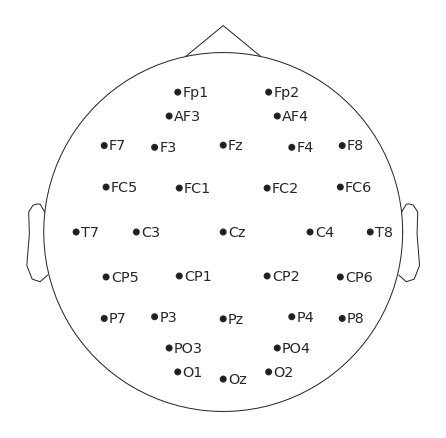

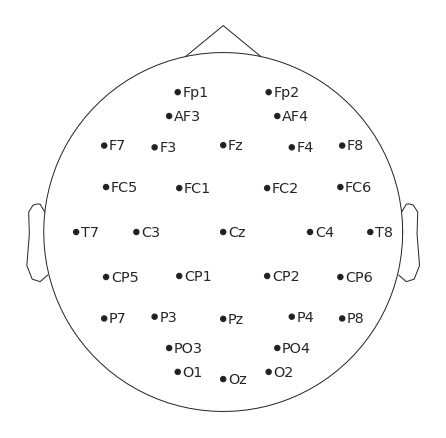

In [33]:
# Plot sensor positions
montage = mne.channels.make_standard_montage("biosemi32")
raw_data.set_montage(montage)
montage.plot()

Effective window size : 16.000 (s)


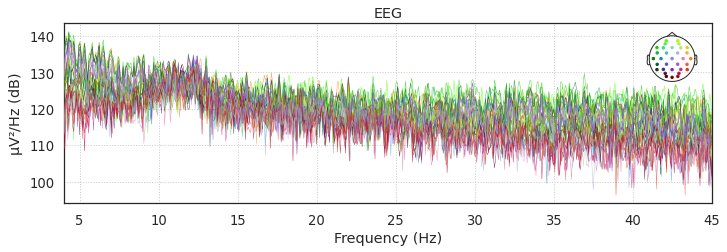

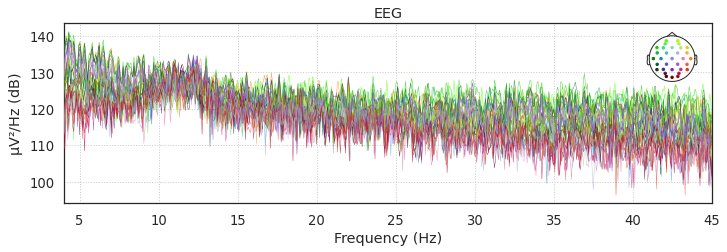

In [34]:
# Plot the power spectral density across channels
mne.viz.plot_raw_psd(raw_data, fmin = 4, fmax= 45)
# mne.viz.plot_raw_psd(raw_data, fmin = 4, fmax= 64)

## 총 1초 데이터?

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 213 samples (1.664 sec)



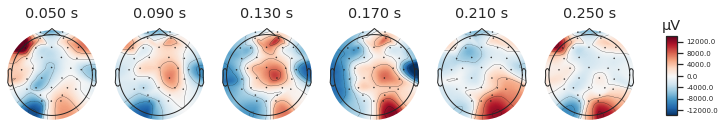

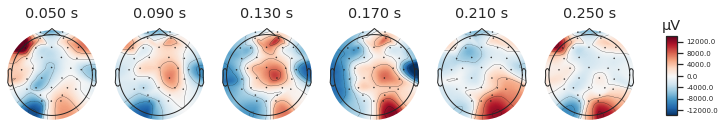

In [35]:
# Theta band, first trial
evData_th = mne.EvokedArray(eeg_data[0], info)
times = np.arange(0.05, 0.251, 0.04)
evData_th.filter(4, 8) 
evData_th.plot_topomap(times, ch_type='eeg', average=60, time_unit='s')

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 213 samples (1.664 sec)



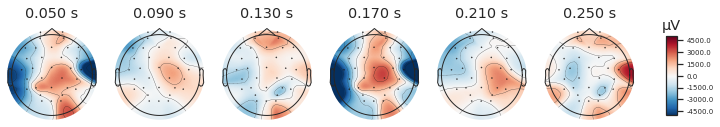

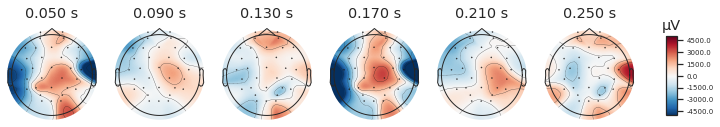

In [36]:
# Alpha band, first trial
evData_al = mne.EvokedArray(eeg_data[0], info)
times = np.arange(0.05, 0.251, 0.04)
evData_al.filter(8, 12) 
evData_al.plot_topomap(times, ch_type='eeg', average=60, time_unit='s')

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 141 samples (1.102 sec)



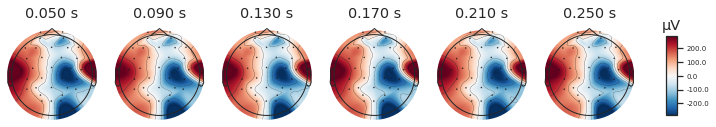

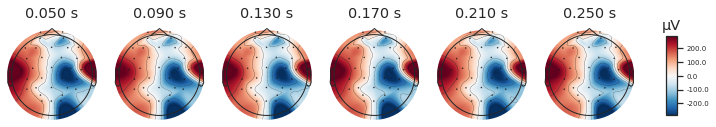

In [37]:
# Beta band, first trial
evData_bt = mne.EvokedArray(eeg_data[0], info)
times = np.arange(0.05, 0.251, 0.04)
evData_bt.filter(12, 30) 
evData_bt.plot_topomap(times, ch_type='eeg', average=60, time_unit='s')

Setting up band-pass filter from 30 - 64 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 63.90 Hz
- Upper transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 63.95 Hz)
- Filter length: 4225 samples (33.008 sec)



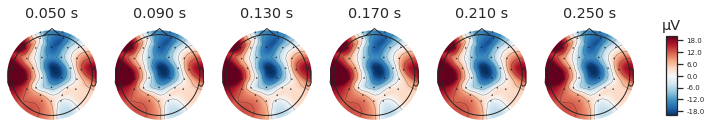

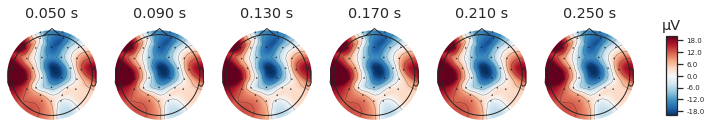

In [38]:
# Gamma band, first trial
evData_gm = mne.EvokedArray(eeg_data[0], info)
times = np.arange(0.05, 0.251, 0.04)
evData_gm.filter(30, 63.9) 
evData_gm.plot_topomap(times, ch_type='eeg', average=60, time_unit='s')

In [91]:
df_labels

,Positive Valence,High Arousal
0,1,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
1275,0,1
1276,0,0
1277,0,0
1278,1,1


In [102]:
# Getting samples from 4 label groups, same subject
ev_data_hahv = mne.EvokedArray(eeg_data[1278], info)
ev_data_halv = mne.EvokedArray(eeg_data[1], info)
ev_data_lahv = mne.EvokedArray(eeg_data[2], info)
ev_data_lalv = mne.EvokedArray(eeg_data[1276], info)

In [26]:
# Plot the topographies across different frequency bands
def plot_topo_psd(evData):
    evData.filter(4, 8) 
    evData.plot_topomap(0.20, ch_type='eeg', average=60, time_unit='s')

    evData.filter(8, 12) 
    evData.plot_topomap(0.20, ch_type='eeg', average=60, time_unit='s')

    evData.filter(12, 30) 
    evData.plot_topomap(0.20, ch_type='eeg', average=60, time_unit='s')

    evData.filter(30, 63.9) 
    evData.plot_topomap(0.20, ch_type='eeg', average=60, time_unit='s')

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 213 samples (1.664 sec)



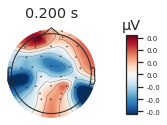

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 213 samples (1.664 sec)



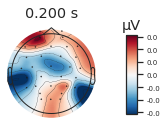

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 141 samples (1.102 sec)



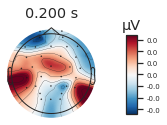

Setting up band-pass filter from 30 - 64 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 63.90 Hz
- Upper transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 63.95 Hz)
- Filter length: 4225 samples (33.008 sec)



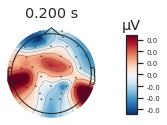

###############################################
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 213 samples (1.664 sec)



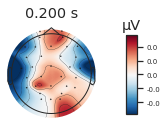

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 213 samples (1.664 sec)



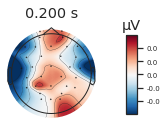

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 141 samples (1.102 sec)



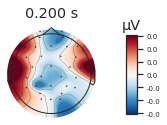

Setting up band-pass filter from 30 - 64 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 63.90 Hz
- Upper transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 63.95 Hz)
- Filter length: 4225 samples (33.008 sec)



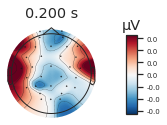

###############################################
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 213 samples (1.664 sec)



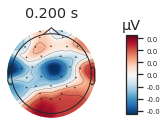

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 213 samples (1.664 sec)



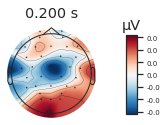

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 141 samples (1.102 sec)



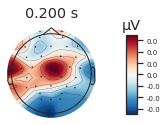

Setting up band-pass filter from 30 - 64 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 63.90 Hz
- Upper transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 63.95 Hz)
- Filter length: 4225 samples (33.008 sec)



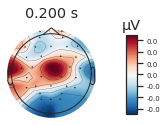

###############################################
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 213 samples (1.664 sec)



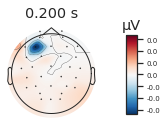

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 213 samples (1.664 sec)



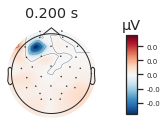

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 141 samples (1.102 sec)



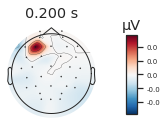

Setting up band-pass filter from 30 - 64 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 63.90 Hz
- Upper transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 63.95 Hz)
- Filter length: 4225 samples (33.008 sec)



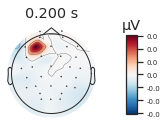

In [181]:
plot_topo_psd(ev_data_hahv)
print("###############################################")
plot_topo_psd(ev_data_halv)
print("###############################################")
plot_topo_psd(ev_data_lahv)
print("###############################################")
plot_topo_psd(ev_data_lalv)

In [23]:
# Deal with NaN values when the model cannot detect peaks in any given range
def check_nans(data, nan_policy='zero'):
    """Check an array for nan values, and replace, based on policy."""
    # Find where there are nan values in the data
    nan_inds = np.where(np.isnan(data))
    # Apply desired nan policy to data
    if nan_policy == 'zero':
        data[nan_inds] = 0
    elif nan_policy == 'mean':
        data[nan_inds] = np.nanmean(data)
    else:
        raise ValueError('Nan policy not understood.')
    return data

In [24]:
from fooof import FOOOFGroup
from fooof.bands import Bands
from mne.time_frequency import psd_welch
from fooof.analysis import get_band_peak_fg
from matplotlib import cm

def plot_psd_fooof(evData):
    fg = FOOOFGroup(peak_width_limits=[1, 6], min_peak_height=0.05, peak_threshold=2., max_n_peaks=6, verbose=False)
    bands = Bands({'theta': [4, 8],'alpha': [8, 12],'beta': [12, 30],'gamma': [30, 64]})
    freq_range = [1, 128]
    # Calculate power spectra across the the continuous data by MNE
    spectra, freqs = psd_welch(evData, fmin=1, fmax=128, tmin=0, tmax=250, n_overlap=150, n_fft=300)
    fg.fit(freqs, spectra, freq_range)
    # Plot the topographies across different frequency bands
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for ind, (label, band_def) in enumerate(bands):
        # Extract the power peaks across channels for the current band
        band_power = check_nans(get_band_peak_fg(fg, band_def)[:, 1])
        # Create a topomap for the current oscillation band
        mne.viz.plot_topomap(band_power, evData.info, cmap=cm.viridis, axes=axes[ind], show=False);
        axes[ind].set_title(label + ' power', {'fontsize' : 16})

In [25]:
def plot_psd_peak(evData):
    fg = FOOOFGroup(peak_width_limits=[1, 6], min_peak_height=0.05, peak_threshold=2., max_n_peaks=6, verbose=False)
    bands = Bands({'theta': [4, 8],'alpha': [8, 12],'beta': [12, 30],'gamma': [30, 64]})
    freq_range = [1, 128]
    # Calculate power spectra across the the continuous data by MNE
    spectra, freqs = psd_welch(evData, fmin=1, fmax=128, tmin=0, tmax=250, n_overlap=150, n_fft=300)
    fg.fit(freqs, spectra, freq_range)
    # Check the largest detected peaks within each band
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    for ind, (label, band_def) in enumerate(bands):
        # Get the power values across channels for the current band
        band_power = check_nans(get_band_peak_fg(fg, band_def)[:, 1])
        # Extracted and plot the power spectrum model with the most band power
        fg.get_fooof(np.argmax(band_power)).plot(ax=axes[ind], add_legend=False)
        axes[ind].yaxis.set_ticklabels([])
        axes[ind].set_title('biggest ' + label + ' peak', {'fontsize' : 16})

Effective window size : 2.344 (s)
Effective window size : 2.344 (s)


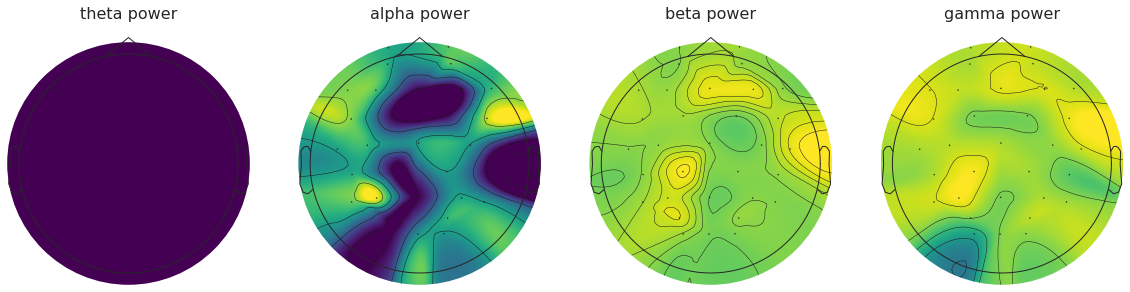

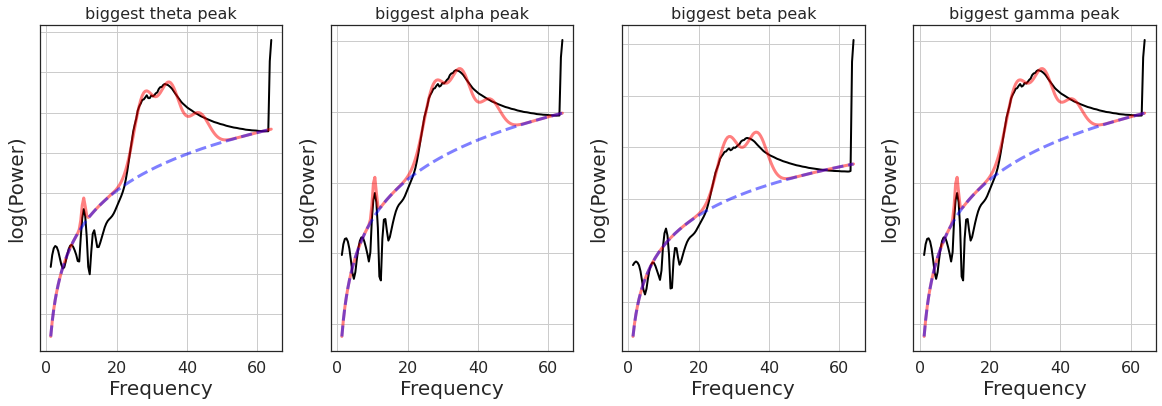

In [108]:
plot_psd_fooof(ev_data_hahv)
plot_psd_peak(ev_data_hahv)

Effective window size : 2.344 (s)
Effective window size : 2.344 (s)


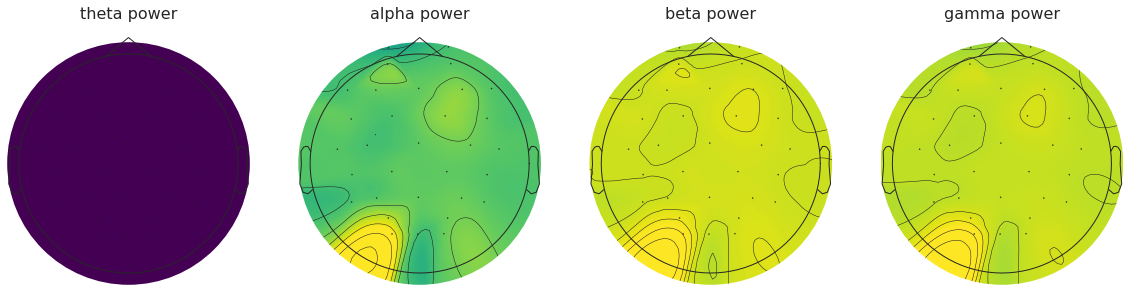

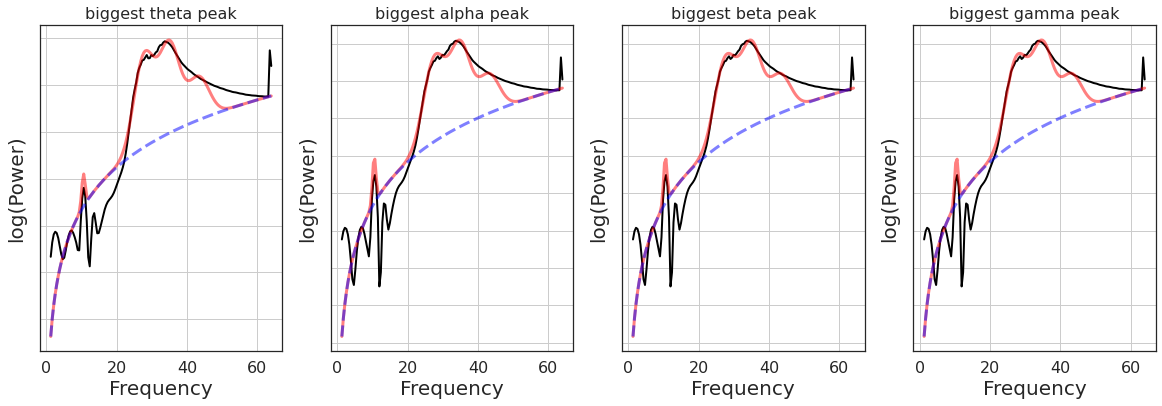

In [109]:
plot_psd_fooof(ev_data_halv)
plot_psd_peak(ev_data_halv)

Effective window size : 2.344 (s)
Effective window size : 2.344 (s)


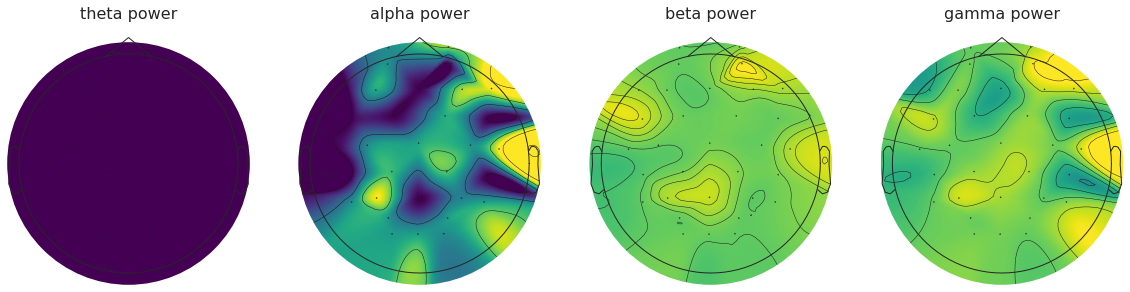

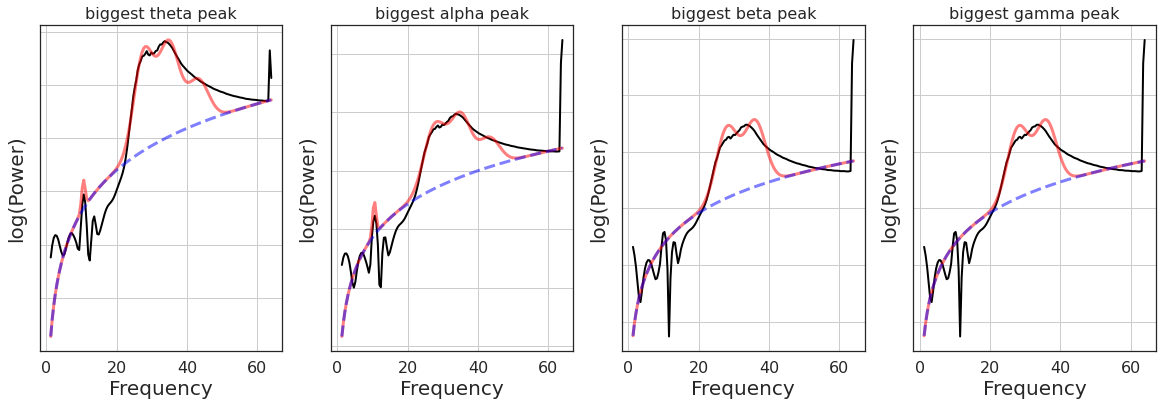

In [110]:
plot_psd_fooof(ev_data_lahv)
plot_psd_peak(ev_data_lahv)

Effective window size : 2.344 (s)
Effective window size : 2.344 (s)


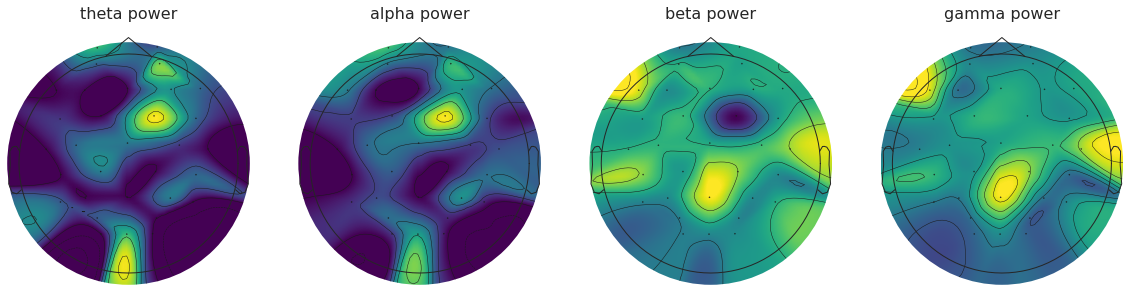

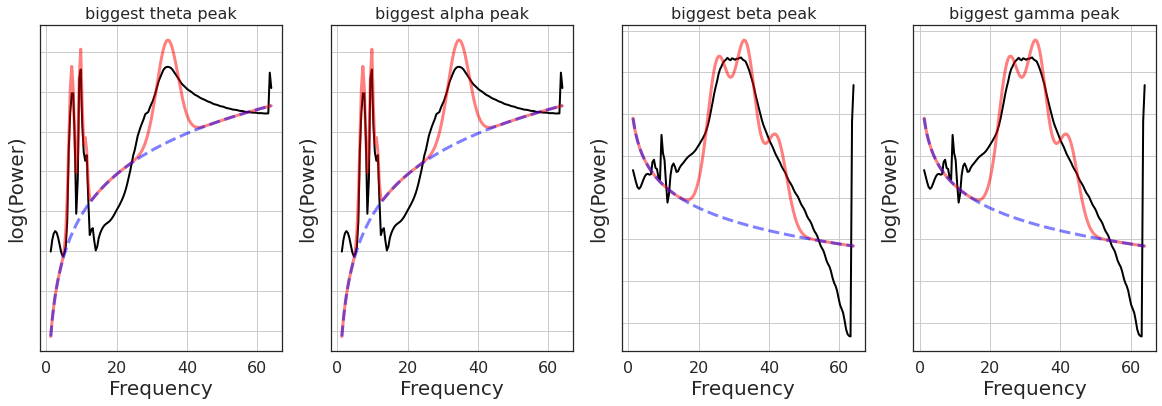

In [111]:
plot_psd_fooof(ev_data_lalv)
plot_psd_peak(ev_data_lalv)

In [30]:
# Transform 880 x 32 x 8064 => 880 x 128
# 128 뜻은 32채널 * 4(theta, alpha, beta, gamma)
# 최종적으로, 모든 trial * 128

eeg_band_arr = []
for i in range (len(eeg_data)):
    for j in range (len(eeg_data[0])):
        eeg_band_arr.append(get_band_power(i,j,"theta"))
        eeg_band_arr.append(get_band_power(i,j,"alpha"))
        eeg_band_arr.append(get_band_power(i,j,"beta"))
        eeg_band_arr.append(get_band_power(i,j,"gamma"))
eeg_band_arr = np.reshape(eeg_band_arr, (-1, 128))

In [31]:
left = np.array(["Fp1", "AF3", "F7", "FC5", "T7"])
right = np.array(["Fp2", "AF4", "F8", "FC6", "T8"])
frontal = np.array(["F3", "FC1", "Fz", "F4", "FC2"])
parietal = np.array(["P3", "P7", "Pz", "P4", "P8"])
occipital = np.array(["O1", "Oz", "O2", "PO3", "PO4"])
central = np.array(["CP5", "CP1", "Cz", "C4", "C3", "CP6", "CP2"])

In [114]:
# Transform 880 x 32 x 8064 => 880 x 32 
eeg_theta = []
for i in range (len(eeg_data)):
    for j in range (len(eeg_data[0])):
        eeg_theta.append(get_band_power(i,j,"theta"))
eeg_theta = np.reshape(eeg_theta, (-1, 32))

df_theta = pd.DataFrame(data = eeg_theta, columns=eeg_channels)
print(df_theta.describe())

                Fp1           AF3            F3            F7           FC5  \
count  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03   
mean   5.171782e+02  9.742560e+02  7.948902e+02  1.513322e+03  7.460983e+02   
std    1.165403e+03  3.147625e+03  3.020764e+03  4.990993e+03  2.188212e+03   
min    3.534489e-21  1.046159e-21  1.064121e-20  6.830063e-20  1.587552e-20   
25%    2.247023e+01  1.680881e+01  1.795996e+01  3.002098e+01  1.362112e+01   
50%    6.546805e+01  8.178586e+01  6.024195e+01  8.854145e+01  4.753627e+01   
75%    3.316366e+02  3.049492e+02  1.753948e+02  2.468394e+02  2.183582e+02   
max    1.552414e+04  3.812287e+04  3.943132e+04  4.927279e+04  2.018267e+04   

                FC1            C3            T7           CP5           CP1  \
count  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03   
mean   3.457667e+02  4.860305e+02  3.526162e+02  6.641480e+02  2.755465e+02   
std    7.174070e+02  1.497657e+03  6.418643e+02  2.

In [115]:
print(df_theta[central].head(5)) 

            CP5           CP1            Cz            C4            C3  \
0  1.882599e-16  5.858341e-17  4.879723e-17  1.373636e-16  1.404994e-16   
1  1.978726e-20  1.343139e-20  1.359931e-20  1.222374e-21  4.210819e-21   
2  3.605636e-17  6.444373e-16  3.725349e-16  2.909156e-17  1.081255e-17   
3  2.656659e+01  1.598280e+02  1.102349e+02  4.390085e+00  1.360949e+01   
4  2.628800e+01  1.665788e+02  1.129892e+02  3.250103e+00  1.096867e+01   

            CP6           CP2  
0  1.200617e-16  2.545513e-17  
1  2.645925e-21  1.975447e-20  
2  7.723102e-18  3.098627e-16  
3  9.423975e+00  1.022718e+02  
4  8.103545e+00  1.039589e+02  


In [116]:
# Transform 880 x 32 x 8064 => 880 x 32 
eeg_alpha = []
for i in range (len(eeg_data)):
    for j in range (len(eeg_data[0])):
        eeg_alpha.append(get_band_power(i,j,"alpha"))
eeg_alpha = np.reshape(eeg_alpha, (-1, 32))

df_alpha = pd.DataFrame(data = eeg_alpha, columns=eeg_channels)
print(df_alpha.describe())

                Fp1           AF3            F3            F7           FC5  \
count  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03   
mean   1.734054e+02  3.330485e+02  2.854295e+02  5.730448e+02  2.496456e+02   
std    3.784310e+02  1.058798e+03  1.036361e+03  1.943868e+03  7.024870e+02   
min    2.105567e-20  6.081004e-21  6.241825e-20  4.060119e-19  9.341015e-20   
25%    1.348173e+01  1.069877e+01  9.889198e+00  1.569879e+01  9.832013e+00   
50%    3.371317e+01  3.447926e+01  3.002679e+01  3.802244e+01  1.983395e+01   
75%    1.255084e+02  1.143349e+02  7.348828e+01  9.213792e+01  7.404094e+01   
max    5.627907e+03  1.238070e+04  1.276472e+04  2.084307e+04  6.575781e+03   

                FC1            C3            T7           CP5           CP1  \
count  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03   
mean   1.379100e+02  1.703508e+02  1.235115e+02  2.325400e+02  9.713795e+01   
std    2.752669e+02  4.975317e+02  2.003446e+02  7.

In [117]:
print(df_alpha[occipital].head(5)) 

             O1            Oz            O2           PO3           PO4
0  2.803023e-16  1.924339e-16  5.544112e-16  4.359222e-17  2.994469e-16
1  6.430987e-21  1.209463e-20  1.464880e-19  1.445239e-21  2.195364e-20
2  7.695567e-16  5.493276e-16  1.077368e-15  6.959112e-16  2.447750e-16
3  2.893829e+01  1.070140e+01  2.246206e+01  1.132980e+01  1.223106e+01
4  2.340435e+01  9.199924e+00  2.104904e+01  1.030833e+01  1.150143e+01


In [118]:
# Transform 880 x 32 x 8064 => 880 x 32 
eeg_beta = []
for i in range (len(eeg_data)):
    for j in range (len(eeg_data[0])):
        eeg_beta.append(get_band_power(i,j,"beta"))
eeg_beta = np.reshape(eeg_beta, (-1, 32))

df_beta = pd.DataFrame(data = eeg_beta, columns=eeg_channels)
print(df_beta.describe())

                Fp1           AF3            F3            F7           FC5  \
count  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03   
mean   9.201621e+01  2.005294e+02  1.932581e+02  3.415223e+02  1.405158e+02   
std    1.762417e+02  6.680708e+02  6.688025e+02  1.274779e+03  3.867819e+02   
min    2.040123e-18  5.928530e-19  6.161657e-18  4.088337e-17  9.259136e-18   
25%    1.757073e+01  1.297886e+01  9.902897e+00  1.780078e+01  1.110624e+01   
50%    3.438255e+01  2.898327e+01  2.812052e+01  3.331446e+01  2.233943e+01   
75%    8.077474e+01  1.076191e+02  5.980755e+01  6.145264e+01  5.316221e+01   
max    3.528485e+03  5.784160e+03  5.841476e+03  1.484870e+04  3.094688e+03   

                FC1            C3            T7           CP5           CP1  \
count  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03   
mean   9.929044e+01  9.681116e+01  7.715433e+01  1.372406e+02  5.474556e+01   
std    1.976056e+02  2.476542e+02  9.025451e+01  4.

In [119]:
print(df_beta[frontal].head(5)) 


             F3           FC1            Fz            F4           FC2
0  3.247632e-14  3.814500e-14  4.666840e-14  4.802945e-14  7.448094e-14
1  6.161657e-18  1.244897e-19  1.334043e-17  8.368123e-20  1.609261e-19
2  6.794233e-14  1.552683e-14  2.409982e-14  2.649057e-14  1.314506e-14
3  2.089543e+01  2.055298e+01  3.112115e+01  1.439492e+01  1.569537e+01
4  1.767551e+01  1.762304e+01  2.657228e+01  1.225948e+01  1.394143e+01


In [120]:
# Transform 880 x 32 x 8064 => 880 x 32 
eeg_gamma = []
for i in range (len(eeg_data)):
    for j in range (len(eeg_data[0])):
        eeg_gamma.append(get_band_power(i,j,"gamma"))
eeg_gamma = np.reshape(eeg_gamma, (-1, 32))

df_gamma = pd.DataFrame(data = eeg_gamma, columns=eeg_channels)
print(df_gamma.describe())

                Fp1           AF3            F3            F7           FC5  \
count  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03   
mean   5.055928e+01  1.504278e+02  1.491761e+02  1.225908e+02  9.154382e+01   
std    1.356216e+02  6.456497e+02  6.320576e+02  4.967813e+02  3.405805e+02   
min    3.576317e-17  7.960902e-18  8.192557e-17  5.337422e-16  1.229378e-16   
25%    8.226783e+00  5.519815e+00  4.281516e+00  7.532546e+00  5.070356e+00   
50%    1.801436e+01  1.393029e+01  1.180288e+01  1.580473e+01  1.259522e+01   
75%    3.999554e+01  4.345461e+01  2.858681e+01  3.601142e+01  3.797751e+01   
max    3.213256e+03  6.060540e+03  5.758757e+03  6.348177e+03  3.472516e+03   

                FC1            C3            T7           CP5           CP1  \
count  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03  1.280000e+03   
mean   6.046655e+01  5.621631e+01  4.364120e+01  7.700175e+01  2.916767e+01   
std    1.392390e+02  1.802917e+02  6.214442e+01  2.

In [121]:
print(df_gamma[parietal].head(5)) 


             P3            P7            Pz            P4            P8
0  7.866073e-13  2.358196e-12  2.486971e-14  1.108472e-12  8.061880e-13
1  2.761973e-16  1.347333e-16  1.367035e-16  6.786300e-18  2.864996e-17
2  1.573814e-11  3.092062e-13  6.384718e-12  6.072836e-14  1.419670e-13
3  1.476374e+01  5.046014e+00  6.024646e+00  2.179170e+00  1.974892e+00
4  1.352738e+01  4.314119e+00  5.384337e+00  1.898411e+00  1.910428e+00


In [32]:
# Split the data into training/testing sets
def split_train_test(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    return x_train, x_test, y_train, y_test

In [33]:
# Feature scaling
def feature_scaling(train, test):
    sc = StandardScaler()
    train = sc.fit_transform(train)
    test = sc.transform(test)
    return train, test

In [34]:
band_names = np.array(["theta", "alpha", "beta", "gamma"])
channel_names = np.array(["left", "frontal", "right", "central", "parietal", "occipital"])
label_names = np.array(["valence", "arousal"])

In [125]:
from sklearn.svm import SVC

# Testing different kernels (linear, sigmoid, rbf, poly) to select the most optimal one
clf_svm = SVC(kernel = 'linear', random_state = 42, probability=True)

In [126]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')

In [127]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='adam', activation='relu', alpha=0.1, max_iter=3000)

In [128]:
models = []
models.append(('SVM', clf_svm))
models.append(('k-NN', clf_knn))
models.append(('MLP', clf_mlp))

In [37]:
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

def cross_validate_clf(df_x, df_y, scoring):
    # Train-test split 
    x_train, x_test, y_train, y_test = split_train_test(df_x, df_y)
    # Feature scaling
    x_train, x_test = feature_scaling(x_train, x_test)

    names = []
    means = []
    stds = []
    times = []

    # Apply CV
    for name, model in models:
        start_time = time.time()
        kfold = model_selection.KFold(n_splits=5)
        cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        t = (time.time() - start_time)
        times.append(t)
        means.append(cv_results.mean())
        stds.append(cv_results.std())
        names.append(name)

    return names, means, stds, times

## Arousal & Valence | Acc & F1 

## 정확도 낮음
## 교수님 강의자료 바둑판
## arousal 이랑 valence가 같이 묶인 위치 eeg band data 값으로 정하는거니까
## label을 arousal & valence 로 묶어서 다시 테스트 해보면 좋을 듯
## 안좋음

In [130]:
cross_validate_clf(eeg_band_arr, df_arousal, 'accuracy')

(['SVM', 'k-NN', 'MLP'],
 [0.5881626319056487, 0.5747858472998137, 0.5993296089385474],
 [0.02084038046032386, 0.027976527167586036, 0.028787813032738162],
 [0.8506622314453125, 0.017107009887695312, 4.635469198226929])

In [131]:
cross_validate_clf(eeg_band_arr, df_arousal, 'f1')

(['SVM', 'k-NN', 'MLP'],
 [0.49369801360806304, 0.5596856045439041, 0.5714513963775698],
 [0.03496608354674498, 0.0234425949921219, 0.0257730163963685],
 [0.8689703941345215, 0.020162105560302734, 4.255950927734375])

In [132]:
cross_validate_clf(eeg_band_arr, df_valence, 'accuracy')

(['SVM', 'k-NN', 'MLP'],
 [0.5646679081315953, 0.5993234016139044, 0.608268156424581],
 [0.03883945201670795, 0.019917682762302637, 0.031749149423619366],
 [0.8901901245117188, 0.01692652702331543, 5.18678879737854])

In [133]:
cross_validate_clf(eeg_band_arr, df_valence, 'f1')

(['SVM', 'k-NN', 'MLP'],
 [0.6473429147082411, 0.6338386183997065, 0.6241013123608161],
 [0.044883397240076145, 0.034525125708054896, 0.009048209154934587],
 [0.947983980178833, 0.020503759384155273, 7.365561246871948])

# LSTM

In [35]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Embedding, Activation
from tensorflow.keras.preprocessing.sequence import pad_sequences


2022-06-24 01:04:24.956023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-24 01:04:24.956092: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [39]:
_x_train, _x_test, _y_train, _y_test = split_train_test(eeg_band_arr, df_arousal)
# Feature scaling
# _x_train, _x_test = feature_scaling(_x_train, _x_test)
print(_x_train.shape)
def create_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(128,1)))
    model.add(Dropout(0.6))
    
#     model.add(LSTM(256, return_sequences=True))
#     model.add(Dropout(0.6))
    
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.4))
    
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

m = create_model()
m.fit(_x_train, _y_train, epochs=5, batch_size=8, validation_data=(_x_test, _y_test))

scores = m.evaluate(_x_test, _y_test)
print("Accuracy: %.2f%%" % (scores*100))

(896, 128)
Epoch 1/5
112/112 [==============================] - 27s 219ms/step - loss: 0.6998 - val_loss: 0.6933
Epoch 2/5
112/112 [==============================] - 24s 212ms/step - loss: 0.6935 - val_loss: 0.6930
Epoch 3/5
112/112 [==============================] - 24s 211ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 4/5
112/112 [==============================] - 24s 213ms/step - loss: 0.6942 - val_loss: 0.6930
Epoch 5/5
12/12 [==============================] - 2s 70ms/step - loss: 0.6933
Accuracy: 69.33%


In [40]:
print(m(_x_test).shape, _y_test.shape)

(384, 128, 1) (384,)


In [41]:
_x_train, _x_test, _y_train, _y_test = split_train_test(eeg_band_arr, df_valence)
# Feature scaling
_x_train, _x_test = feature_scaling(_x_train, _x_test)
print(_x_train.shape)

m = create_model()
m.fit(_x_train, _y_train, epochs=5, batch_size=8)

scores = m.evaluate(_x_test, _y_test)
print("Accuracy: %.2f%%" % (scores*100))

(896, 128)
Epoch 1/5
112/112 [==============================] - 13s 91ms/step - loss: 0.6932
Epoch 2/5
112/112 [==============================] - 10s 85ms/step - loss: 0.6930
Epoch 3/5
112/112 [==============================] - 10s 85ms/step - loss: 0.6924
Epoch 4/5
112/112 [==============================] - 10s 85ms/step - loss: 0.6916
Epoch 5/5
12/12 [==============================] - 1s 61ms/step - loss: 0.6905
Accuracy: 69.05%


In [71]:
def run_clf_cv(band, channel, label, clf):
    if (band == "theta"):
        df_x = df_theta
    elif (band == "alpha"):
        df_x = df_alpha
    elif (band == "beta"):
        df_x = df_beta
    elif (band == "gamma"):
        df_x = df_gamma

    if (channel == "left"):
        df_x = df_x[left]
    elif (channel == "right"):
        df_x = df_x[right]
    elif (channel == "frontal"):
        df_x = df_x[frontal]
    elif (channel == "central"):
        df_x = df_x[central]
    elif (channel == "parietal"):
        df_x = df_x[parietal]
    elif (channel == "occipital"):
        df_x = df_x[occipital]

    df_y = df_arousal if (label == "arousal") else df_valence

    # Train-test split
    x_train, x_test, y_train, y_test = split_train_test(df_x, df_y)

    # Apply CV
    x_for_kfold = np.array(x_train)            
    y_for_kfold = np.array(y_train)
    kfold = model_selection.KFold(n_splits=5)

    for i, j in kfold.split(x_for_kfold):
        x_train2, x_test2 = x_for_kfold[i], x_for_kfold[j]
        y_train2, y_test2 = y_for_kfold[i], y_for_kfold[j]

    # Feature scaling
    x_train2, x_test2 = feature_scaling(x_train2, x_test2)

    if (clf == "svm"):
        clf_svm.fit(x_train2, y_train2)
        y_predict = clf_svm.predict(x_test2)
    elif (clf == "knn"):
        clf_knn.fit(x_train2, y_train2)
        y_predict = clf_knn.predict(x_test2)
    elif (clf == "mlp"):
        clf_mlp.fit(x_train2, y_train2)
        y_predict = clf_mlp.predict(x_test2)

    return y_test2, y_predict

In [72]:
from sklearn.metrics import accuracy_score

def get_accuracy(band, channel, label, clf):
    y_test2, y_predict = run_clf_cv(band, channel, label, clf)
    return np.round(accuracy_score(y_test2, y_predict)*100,2)

In [73]:
def print_accuracy(label, clf):
    arr = []
    for i in range (len(band_names)):
        for j in range (len(channel_names)): 
            arr.append(get_accuracy(band_names[i], channel_names[j], label, clf))
    arr = np.reshape(arr, (4,6))
    df = pd.DataFrame(data = arr, index=band_names, columns=channel_names)

    print("Top 3 EEG regions with highest scores")
    print(df.apply(lambda s: s.abs()).max().nlargest(3))
    print()
    print("Top 2 bands with highest scores")
    print(df.apply(lambda s: s.abs()).max(axis=1).nlargest(2))
    print()
    print("EEG region with highest scores per each band")
    print(df.idxmax(axis=1))
    print()
    print("Band with highest scores per each EEG region")
    print(df.idxmax())
    print()
    print(df)

In [74]:
from sklearn.metrics import f1_score

def get_f1(band, channel, label, clf):
    y_test2, y_predict = run_clf_cv(band, channel, label, clf)
    return np.round(f1_score(y_test2, y_predict)*100,2)

In [75]:
def print_f1(label, clf):
    arr = []
    for i in range (len(band_names)):
        for j in range (len(channel_names)): 
            arr.append(get_f1(band_names[i], channel_names[j], label, clf))
    arr = np.reshape(arr, (4,6))
    df = pd.DataFrame(data = arr, index=band_names, columns=channel_names)

    print("Top 3 EEG regions with highest scores")
    print(df.apply(lambda s: s.abs()).max().nlargest(3))
    print()
    print("Top 2 bands with highest scores")
    print(df.apply(lambda s: s.abs()).max(axis=1).nlargest(2))
    print()
    print("EEG region with highest scores per each band")
    print(df.idxmax(axis=1))
    print()
    print("Band with highest scores per each EEG regions")
    print(df.idxmax())
    print()
    print(df)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

def plot_cm(band, channel, label, clf):
    y_test2, y_predict = run_clf_cv(band, channel, label, clf)
    cm = confusion_matrix(y_test2, y_predict)
    print(cm)
    cr = classification_report(y_test2, y_predict)
    print(cr)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()

    if (label == "valence"):
        classes = df_valence.unique().tolist()
    if (label == "arousal"):
        classes = df_arousal.unique().tolist()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [77]:
print_accuracy('valence', 'svm')

Top 3 EEG regions with highest scores
left       59.78
frontal    59.78
central    59.78
dtype: float64

Top 2 bands with highest scores
theta    59.78
alpha    59.78
dtype: float64

EEG region with highest scores per each band
theta       left
alpha    central
beta        left
gamma       left
dtype: object

Band with highest scores per each EEG region
left         theta
frontal      theta
right        gamma
central      alpha
parietal     gamma
occipital    alpha
dtype: object

        left  frontal  right  central  parietal  occipital
theta  59.78    59.78  58.10    59.22     58.10      57.54
alpha  58.66    58.10  58.66    59.78     57.54      59.22
beta   58.66    56.98  58.66    56.98     57.54      57.54
gamma  59.78    58.66  59.22    58.66     58.66      59.22


In [79]:
print_accuracy('valence', 'knn')

Top 3 EEG regions with highest scores
central      59.78
occipital    59.78
frontal      58.10
dtype: float64

Top 2 bands with highest scores
alpha    59.78
gamma    59.78
dtype: float64

EEG region with highest scores per each band
theta      central
alpha    occipital
beta       frontal
gamma      central
dtype: object

Band with highest scores per each EEG region
left         gamma
frontal       beta
right        gamma
central      gamma
parietal     gamma
occipital    alpha
dtype: object

        left  frontal  right  central  parietal  occipital
theta  55.31    49.16  56.42    57.54     55.87      56.98
alpha  51.40    51.40  55.31    59.22     52.51      59.78
beta   53.63    58.10  49.16    58.10     56.42      53.63
gamma  57.54    55.31  56.98    59.78     58.10      58.10


In [80]:
print_accuracy('valence', 'mlp')

Top 3 EEG regions with highest scores
frontal    60.89
central    60.34
left       59.22
dtype: float64

Top 2 bands with highest scores
theta    60.89
alpha    60.34
dtype: float64

EEG region with highest scores per each band
theta     frontal
alpha     central
beta         left
gamma    parietal
dtype: object

Band with highest scores per each EEG region
left          beta
frontal      theta
right        alpha
central      alpha
parietal     gamma
occipital    theta
dtype: object

        left  frontal  right  central  parietal  occipital
theta  57.54    60.89  58.66    57.54     55.31      58.10
alpha  56.98    56.42  59.22    60.34     53.07      57.54
beta   59.22    58.10  56.98    58.66     57.54      57.54
gamma  56.98    56.42  56.42    54.75     59.22      55.87


In [78]:
print_accuracy('arousal', 'svm')

Top 3 EEG regions with highest scores
central     55.31
parietal    54.19
left        53.07
dtype: float64

Top 2 bands with highest scores
alpha    55.31
gamma    54.19
dtype: float64

EEG region with highest scores per each band
theta     central
alpha     central
beta     parietal
gamma    parietal
dtype: object

Band with highest scores per each EEG region
left         gamma
frontal      gamma
right        theta
central      alpha
parietal     gamma
occipital     beta
dtype: object

        left  frontal  right  central  parietal  occipital
theta  48.60    50.28  52.51    53.63     49.72      50.84
alpha  48.04    51.40  52.51    55.31     52.51      51.40
beta   49.16    51.40  51.40    53.07     53.63      51.96
gamma  53.07    51.96  51.40    53.07     54.19      51.40


In [81]:
print_accuracy('arousal', 'knn')

Top 3 EEG regions with highest scores
right       60.34
central     60.34
parietal    59.78
dtype: float64

Top 2 bands with highest scores
alpha    60.34
theta    59.78
dtype: float64

EEG region with highest scores per each band
theta        right
alpha        right
beta     occipital
gamma    occipital
dtype: object

Band with highest scores per each EEG region
left         theta
frontal      gamma
right        alpha
central      alpha
parietal     theta
occipital    alpha
dtype: object

        left  frontal  right  central  parietal  occipital
theta  55.31    54.75  59.78    55.31     59.78      56.42
alpha  52.51    54.75  60.34    60.34     58.66      59.78
beta   55.31    54.19  55.87    54.19     55.87      58.10
gamma  54.19    56.98  55.31    56.42     55.87      58.10


In [82]:
print_accuracy('arousal', 'mlp')

Top 3 EEG regions with highest scores
occipital    62.01
right        59.22
central      58.10
dtype: float64

Top 2 bands with highest scores
gamma    62.01
beta     59.78
dtype: float64

EEG region with highest scores per each band
theta    occipital
alpha    occipital
beta     occipital
gamma    occipital
dtype: object

Band with highest scores per each EEG region
left         theta
frontal      gamma
right         beta
central      gamma
parietal     theta
occipital    gamma
dtype: object

        left  frontal  right  central  parietal  occipital
theta  53.07    53.63  51.96    49.16     56.42      57.54
alpha  49.16    52.51  53.63    46.37     54.75      57.54
beta   48.60    52.51  59.22    53.07     53.63      59.78
gamma  51.96    55.87  59.22    58.10     55.31      62.01


In [83]:
print_f1('valence', 'knn')

Top 3 EEG regions with highest scores
occipital    65.71
central      64.81
frontal      63.41
dtype: float64

Top 2 bands with highest scores
alpha    65.71
theta    64.81
dtype: float64

EEG region with highest scores per each band
theta      central
alpha    occipital
beta       frontal
gamma      central
dtype: object

Band with highest scores per each EEG regions
left         gamma
frontal       beta
right        theta
central      theta
parietal     gamma
occipital    alpha
dtype: object

        left  frontal  right  central  parietal  occipital
theta  59.60    54.73  61.00    64.81     61.46      62.44
alpha  56.28    57.56  59.18    64.04     58.54      65.71
beta   58.71    63.41  54.27    62.31     61.39      58.29
gamma  62.38    60.40  60.91    63.64     61.93      63.05


In [86]:
print_f1('valence', 'svm')


Top 3 EEG regions with highest scores
left         74.29
right        73.84
occipital    73.45
dtype: float64

Top 2 bands with highest scores
gamma    74.29
beta     73.38
dtype: float64

EEG region with highest scores per each band
theta     left
alpha    right
beta      left
gamma     left
dtype: object

Band with highest scores per each EEG regions
left         gamma
frontal      theta
right        gamma
central      gamma
parietal     gamma
occipital    gamma
dtype: object

        left  frontal  right  central  parietal  occipital
theta  73.13    72.73  72.73    72.03     72.12      71.85
alpha  72.18    71.48  72.99    72.73     72.06      72.86
beta   73.38    70.27  72.99    71.59     72.46      71.43
gamma  74.29    72.59  73.84    73.19     73.38      73.45


In [182]:
print_f1('valence', 'mlp')

Top 3 EEG regions with highest scores
right      72.66
left       72.52
central    72.12
dtype: float64

Top 2 bands with highest scores
alpha    72.66
beta     72.52
dtype: float64

EEG region with highest scores per each band
theta        right
alpha        right
beta          left
gamma    occipital
dtype: object

Band with highest scores per each EEG regions
left          beta
frontal      theta
right        alpha
central       beta
parietal      beta
occipital    theta
dtype: object

        left  frontal  right  central  parietal  occipital
theta  68.31    71.81  72.24    70.82     65.22      70.99
alpha  67.50    69.80  72.66    71.32     66.39      70.72
beta   72.52    71.04  71.38    72.12     71.43      69.73
gamma  68.55    70.00  67.23    63.93     68.62      70.90


In [84]:
print_f1('arousal', 'knn')


Top 3 EEG regions with highest scores
right       57.49
central     57.49
parietal    56.63
dtype: float64

Top 2 bands with highest scores
alpha    57.49
theta    57.14
dtype: float64

EEG region with highest scores per each band
theta        right
alpha        right
beta     occipital
gamma      frontal
dtype: object

Band with highest scores per each EEG regions
left         theta
frontal       beta
right        alpha
central      alpha
parietal     theta
occipital     beta
dtype: object

        left  frontal  right  central  parietal  occipital
theta  52.38    53.71  57.14    53.49     56.63      54.65
alpha  49.70    54.24  57.49    57.49     55.42      55.56
beta   51.22    54.44  54.86    52.33     55.37      55.62
gamma  51.76    54.44  49.37    48.68     47.68      52.23


In [85]:
print_f1('arousal', 'svm')


Top 3 EEG regions with highest scores
central     22.43
left        22.22
parietal    14.14
dtype: float64

Top 2 bands with highest scores
theta    22.43
gamma    22.22
dtype: float64

EEG region with highest scores per each band
theta    central
alpha    central
beta        left
gamma       left
dtype: object

Band with highest scores per each EEG regions
left         gamma
frontal      gamma
right        theta
central      theta
parietal     alpha
occipital     beta
dtype: object

        left  frontal  right  central  parietal  occipital
theta   8.00     2.20   6.59    22.43     10.00       8.33
alpha  16.22     0.00   6.59    21.57     14.14       8.42
beta   16.51     0.00   0.00    16.00      8.79      10.42
gamma  22.22     2.27   0.00    10.64     12.77       4.40


In [183]:
print_f1('arousal', 'mlp')

Top 3 EEG regions with highest scores
central      56.14
parietal     55.21
occipital    53.52
dtype: float64

Top 2 bands with highest scores
beta     56.14
alpha    55.21
dtype: float64

EEG region with highest scores per each band
theta     parietal
alpha     parietal
beta       central
gamma    occipital
dtype: object

Band with highest scores per each EEG regions
left         gamma
frontal      theta
right        gamma
central       beta
parietal     alpha
occipital    gamma
dtype: object

        left  frontal  right  central  parietal  occipital
theta  36.64    53.33  19.23    51.81     53.42      37.29
alpha  32.31    51.50  26.17    51.58     55.21      36.21
beta   30.08    46.05  34.48    56.14     43.97      38.33
gamma  38.85    41.18  41.54    49.32     38.10      53.52


## combination Test Valence

[[  3  70]
 [  2 104]]
              precision    recall  f1-score   support

           0       0.60      0.04      0.08        73
           1       0.60      0.98      0.74       106

    accuracy                           0.60       179
   macro avg       0.60      0.51      0.41       179
weighted avg       0.60      0.60      0.47       179



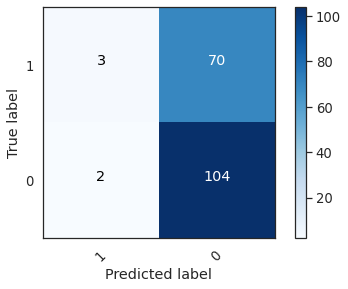

In [87]:
plot_cm('gamma', 'left', 'valence', 'svm')


[[ 9 64]
 [ 8 98]]
              precision    recall  f1-score   support

           0       0.53      0.12      0.20        73
           1       0.60      0.92      0.73       106

    accuracy                           0.60       179
   macro avg       0.57      0.52      0.47       179
weighted avg       0.57      0.60      0.51       179



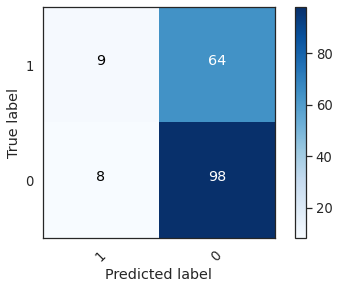

In [184]:
plot_cm('alpha', 'right', 'valence', 'mlp')

[[15 58]
 [13 93]]
              precision    recall  f1-score   support

           0       0.54      0.21      0.30        73
           1       0.62      0.88      0.72       106

    accuracy                           0.60       179
   macro avg       0.58      0.54      0.51       179
weighted avg       0.58      0.60      0.55       179



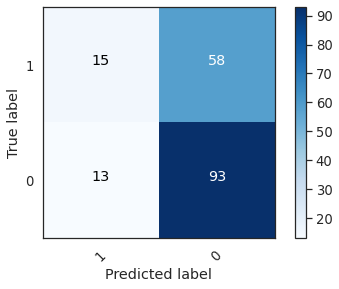

In [186]:
plot_cm('theta', 'frontal', 'valence', 'mlp')

[[33 40]
 [42 64]]
              precision    recall  f1-score   support

           0       0.44      0.45      0.45        73
           1       0.62      0.60      0.61       106

    accuracy                           0.54       179
   macro avg       0.53      0.53      0.53       179
weighted avg       0.54      0.54      0.54       179



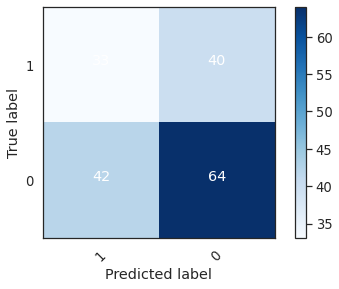

In [189]:
plot_cm('alpha', 'optical', 'valence', 'knn')

[[40 33]
 [41 65]]
              precision    recall  f1-score   support

           0       0.49      0.55      0.52        73
           1       0.66      0.61      0.64       106

    accuracy                           0.59       179
   macro avg       0.58      0.58      0.58       179
weighted avg       0.59      0.59      0.59       179



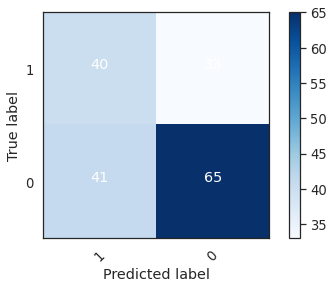

In [190]:
plot_cm('alpha', 'central', 'valence', 'knn')

# Combination test  Arousal

[[54 38]
 [43 44]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.57        92
           1       0.54      0.51      0.52        87

    accuracy                           0.55       179
   macro avg       0.55      0.55      0.55       179
weighted avg       0.55      0.55      0.55       179



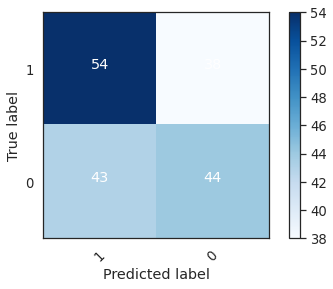

In [88]:
plot_cm('theta', 'frontal', 'arousal', 'mlp')


[[68 24]
 [48 39]]
              precision    recall  f1-score   support

           0       0.59      0.74      0.65        92
           1       0.62      0.45      0.52        87

    accuracy                           0.60       179
   macro avg       0.60      0.59      0.59       179
weighted avg       0.60      0.60      0.59       179



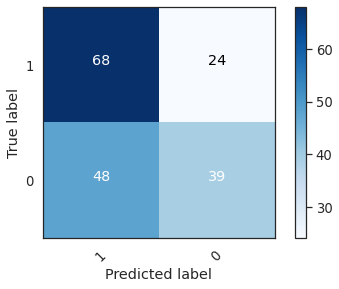

In [187]:
plot_cm('beta', 'central', 'arousal', 'mlp')



[[61 31]
 [39 48]]
              precision    recall  f1-score   support

           0       0.61      0.66      0.64        92
           1       0.61      0.55      0.58        87

    accuracy                           0.61       179
   macro avg       0.61      0.61      0.61       179
weighted avg       0.61      0.61      0.61       179



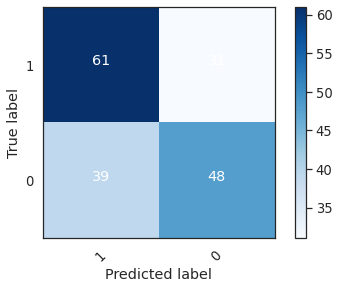

In [188]:
plot_cm('alpha', 'right', 'arousal', 'knn')